## Mean-Shift Clustering

Mean-Shift Clustering also known as Meanshift clustering seeks to cluster points iteratively towards a mode value. Hence, this algorithm is sometimes called Mode-Shift Algorithm. It uses a sliding window across a set of points, and the algorithm seeks a high density of points -- mean seeking. It keep iteratively doing this until it cannot reach a higher density -- the local maxim. This local maxim is repeated across other possible clusters.

The source used in this notebook is found [here](https://www.geeksforgeeks.org/ml-mean-shift-clustering/)


In [1]:
#imports
import numpy as np 
from sklearn.cluster import MeanShift 
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Creating Dataset
# We will be using the make_blobs method 
# in order to generate our own data. 

#4 distinct clusters
x0 = -3 * np.random.rand(100,3)
x1 =  3 * np.random.rand(100,3)
x2 = -2 * np.random.rand(100,3)
x3 =1 + 4 * np.random.rand(100,3)

#offsetting
x0 = np.array([[i[0]-5, i[1]-5, i[2]-5] for i in x0])
x1 = np.array([[i[0], i[1], i[2]] for i in x1])
x2 = np.array([[i[0]-10, i[1]+10, i[2]+10] for i in x2])
x3 = np.array([[i[0]+3, i[1]+5, i[2]-5] for i in x3])



In [3]:
data_whole = np.zeros((400,3))
data_whole[0:100, :] = x0
data_whole[100:200, :] = x1
data_whole[200:300, :] = x2
data_whole[300:400, :] = x3

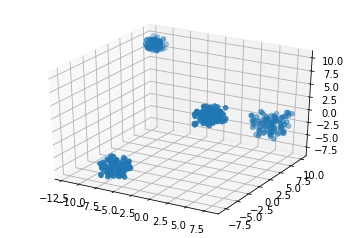

In [4]:
fig = plt.figure() 

ax = fig.add_subplot(111, projection ='3d') 

ax.scatter(data_whole[:, 0], data_whole[:, 1], data_whole[:, 2], marker ='o') 

plt.show() 

In [5]:
# After training the model, We store the 
# coordinates for the cluster centers 
meanShift = MeanShift(bandwidth = 2) 
meanShift.fit(data_whole) 
cluster_centers = meanShift.cluster_centers_ 
cluster_centers

array([[-11.06209434,   8.92934206,   8.998259  ],
       [ -6.45049419,  -6.31924129,  -6.52410643],
       [  1.45601168,   1.53256006,   1.79437418],
       [  6.41561675,   7.77851158,  -2.33898172]])

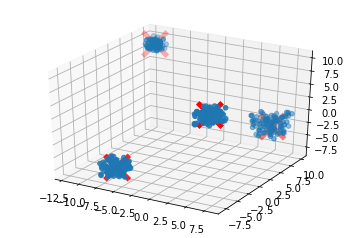

In [6]:
# Finally We plot the data points 
# and centroids in a 3D graph. 
fig = plt.figure() 

ax = fig.add_subplot(111, projection ='3d') 

ax.scatter(data_whole[:, 0], data_whole[:, 1], data_whole[:, 2], marker ='o') 

ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
cluster_centers[:, 2], marker ='x', color ='red', 
s = 600, linewidth = 5, zorder = 10) 

plt.show() 


In [7]:
#Showing Possesion Mapping
#Let us see to what extent does 
point_array = []
density_factor = 1
for x in range(-10*density_factor,10*density_factor):
    for y in range(-10*density_factor,10*density_factor):
        for z in range(-10*density_factor,10*density_factor):
            point_array.append((np.array([x,y,z]))/density_factor)


In [8]:
color_point_array = []

for point in point_array:
    ans = meanShift.predict(point.reshape(1,-1))
    color_point_array.append([point, ans.tolist()])

In [9]:
len(color_point_array)

8000

In [10]:
color_0 = [i[0].tolist() for i in color_point_array if i[1][0] == 0 ]
color_1 = [i[0].tolist() for i in color_point_array if i[1][0] == 1 ]
color_2 = [i[0].tolist() for i in color_point_array if i[1][0] == 2 ]
color_3 = [i[0].tolist() for i in color_point_array if i[1][0] == 3 ]

color_0x = [i[0] for i in color_0]
color_0y = [i[1] for i in color_0]
color_0z = [i[2] for i in color_0]
color_1x = [i[0] for i in color_1]
color_1y = [i[1] for i in color_1]
color_1z = [i[2] for i in color_1]
color_2x = [i[0] for i in color_2]
color_2y = [i[1] for i in color_2]
color_2z = [i[2] for i in color_2]
color_3x = [i[0] for i in color_3]
color_3y = [i[1] for i in color_3]
color_3z = [i[2] for i in color_3]

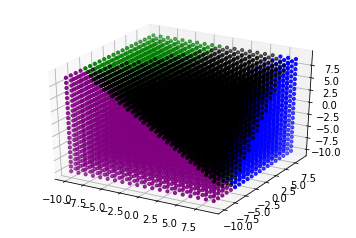

In [11]:
fig = plt.figure() 

ax = fig.add_subplot(111, projection ='3d') 

ax.scatter(color_0x, color_0y, color_0z, s = 10, color='g')
ax.scatter(color_1x, color_1y, color_1z, s = 10, color='purple')
ax.scatter(color_2x, color_2y, color_2z, s = 10, color='k')
ax.scatter(color_3x, color_3y, color_3z, s = 10, color='b')

plt.show() 